# <center>基于机器学习的城区个人养老模式预测与分析</center>

<center>作者1, 作者2</center>

1. 工作单位
2. 工作单位

## 摘要

### 目的

通过对局部人群调查量表的计算分析，明确机器学习对于城市人群养老倾向性的指导意义。

### 方法

通过Tencent调查平台建立调查量表，在XXX区域发放并指导相关个人进行填写; 资料汇总后进行规范化录入保存至Excel文件，导入至Jupyter Notebook平台基于Scikit Learn机器学习工具包进行分析。

### 结果

调查采集XXXX年XXXX月-xxxx年xxxx月XXX城区个体共322人，每份29个问答资料，平均年龄XXX岁，其中XXX人（xx%）选择居家养老，机器学习决策树（ENGLISH）模型调参后基于全部资料预测准确度0.90，交叉验证评分0.83;基于基本情况feature的预测准确度为0.90, 交叉验证评分0.85。对养老模式选择的影响因素前五项分别为XXX，XXX，XXX，XXX，XXX。养老的心理期待值体现为对XXX（xx%），XXX（xx%），XXX（xx%）具有强烈的意愿，与XXX相关，模型对其心理预测推断值为xxx%。

### 讨论

城市人群的养老意愿可以对调查量表进行机器学习的方法进行预测，个人的基本情况很大程度决定了其养老倾向，这种方式有助于对局部人群养老的政策进行更科学的规划。

## 关键词

Machine Learning,  Aged Care, 

## 引言

1. 什么是养老，为什么要研究养老;
2. 目前国外养老的模式是什么，有哪些优缺点;
3. 目前国内的养老模式是什么，有哪些优缺点;
4. 针对这些缺点目前有哪些方法，具体怎么操作的;
5. 为什么选择机器学习的方法，有哪些具体事项;
6. 选择机器学习研究本项目的目的是什么？

## 材料与方法

1. 调查问卷设计的过程是这样的
2. 调查的人群方式
3. 填表的相关说明
4. 数据处理的方式

## 结果

In [419]:
import numpy as np
import scipy.stats as scs
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scikitplot as skplt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.neural_network import MLPClassifier

from xgboost import XGBClassifier

import warnings
warnings.filterwarnings('ignore')

pd.set_option('precision', 2)
pd.options.display.max_columns = None # Show all columns
pd.options.display.max_rows = None # Show all columns

###  1. 数据统一录入至Excel表格

In [420]:
data = pd.read_excel('./yanglao.xls')
data.head()

,GRP,AGE,SEX,CUL,PRO,INC,LOC,SEL,SRC,REA,WIL,PAY,CHI,REL,IHE,IAP,INU,IIN,ILO,IRE,IME,ICA,IFR,IAC,IIN.1,IST,IFA,IPO,ICI
0,4,2,2,5,2,3,1,1,1,3,1,2,2,1,1,1,1,1,1,1,1,3,3,3,3,5,5,5,1
1,3,1,2,3,1,4,3,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2,5,1,2,4,4,4,3,1,2,4,3,2,2,1,2,1,2,2,1,2,1,3,1,1,1,1,2,1,1
3,3,1,2,3,5,4,5,1,2,5,1,3,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,3,1,1,5,1,1,5,1,1,3,1,1,3,1,2,2,2,3,2,3,1,3,2,3,2,2,1,2,2


### 2. 各选项结果进行详细说明

In [421]:
data.astype('category').describe()

,GRP,AGE,SEX,CUL,PRO,INC,LOC,SEL,SRC,REA,WIL,PAY,CHI,REL,IHE,IAP,INU,IIN,ILO,IRE,IME,ICA,IFR,IAC,IIN.1,IST,IFA,IPO,ICI
count,322,322,322,322,322,322,322,322,322,322,322,322,322,322,322,322,322,322,322,322,322,322,322,322,322,322,322,322,322
unique,6,5,2,5,5,5,5,3,4,5,3,6,4,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
top,3,1,2,5,1,4,1,1,1,4,1,0,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
freq,120,196,202,154,118,132,140,282,254,140,126,106,192,186,210,180,186,184,170,218,252,162,182,184,198,154,136,202,250


In [422]:
data.describe()

,GRP,AGE,SEX,CUL,PRO,INC,LOC,SEL,SRC,REA,WIL,PAY,CHI,REL,IHE,IAP,INU,IIN,ILO,IRE,IME,ICA,IFR,IAC,IIN.1,IST,IFA,IPO,ICI
count,322.00,322.00,322.00,322.00,322.00,322.00,322.00,322.00,322.00,322.00,322.00,322.00,322.00,322.00,322.00,322.00,322.00,322.00,322.00,322.00,322.00,322.00,322.00,322.00,322.00,322.00,322.00,322.00,322.00
mean,3.24,1.84,1.63,3.94,2.23,3.32,2.20,1.15,1.48,2.87,1.89,1.54,2.24,1.31,1.56,1.72,1.76,1.84,1.91,1.53,1.35,2.01,1.83,1.73,1.64,1.95,2.14,1.56,1.32
std,1.47,1.20,0.48,1.20,1.32,1.07,1.21,0.45,1.00,1.37,0.81,1.42,0.67,0.78,0.93,1.00,1.08,1.19,1.20,0.91,0.78,1.27,1.18,1.06,0.94,1.17,1.23,0.92,0.69
min,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
25%,2.00,1.00,1.00,3.00,1.00,3.00,1.00,1.00,1.00,1.00,1.00,0.00,2.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
50%,3.00,1.00,2.00,4.00,2.00,4.00,2.00,1.00,1.00,3.00,2.00,2.00,2.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,2.00,2.00,1.00,1.00
75%,5.00,3.00,2.00,5.00,3.00,4.00,3.00,1.00,1.00,4.00,3.00,2.00,3.00,2.00,2.00,2.00,2.00,2.00,3.00,2.00,1.00,3.00,2.00,2.00,2.00,2.00,3.00,2.00,1.00
max,6.00,5.00,2.00,5.00,5.00,5.00,5.00,4.00,4.00,5.00,3.00,5.00,4.00,4.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00


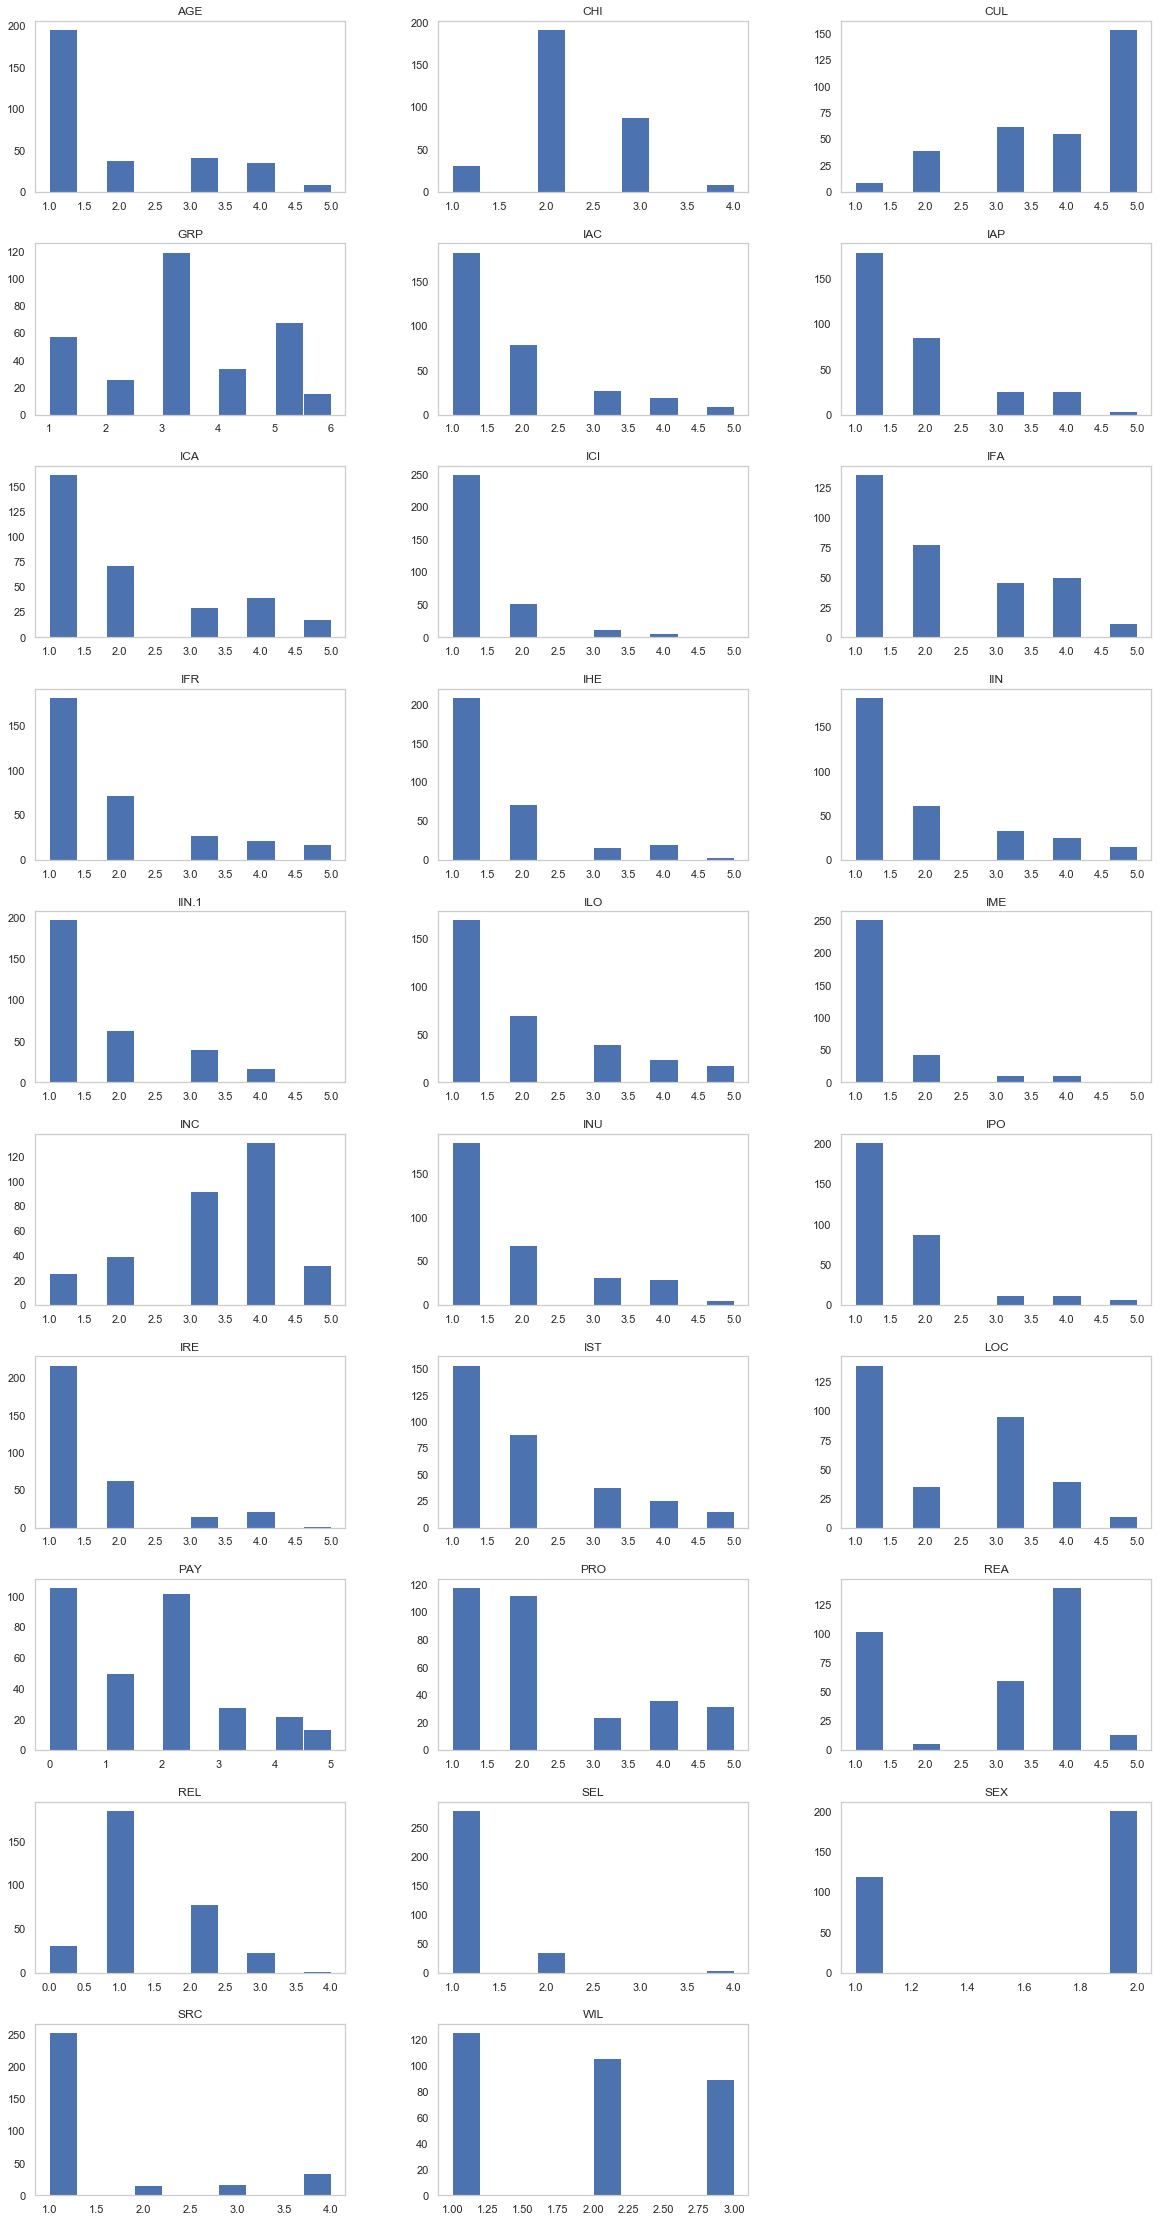

In [423]:
data.hist(column=None, grid=False, figsize=(20,40), layout=(10,3));

### 3. 分项分析

按照本文立意进行分组，分组原则：本研究旨在通过分析目标人群的客观条件和心理因素，预测分析其选择居家养老和家外养老的可能性，故将目标人群对养老方式的选择分为居家=0,家外=1。（选项1-3定为0,选项4-6定为1）

In [424]:
def devide_grp(x):
    return 0 if x<4 else 1
data['GRP'] = data['GRP'].apply(devide_grp)
data.head()

,GRP,AGE,SEX,CUL,PRO,INC,LOC,SEL,SRC,REA,WIL,PAY,CHI,REL,IHE,IAP,INU,IIN,ILO,IRE,IME,ICA,IFR,IAC,IIN.1,IST,IFA,IPO,ICI
0,1,2,2,5,2,3,1,1,1,3,1,2,2,1,1,1,1,1,1,1,1,3,3,3,3,5,5,5,1
1,0,1,2,3,1,4,3,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2,1,1,2,4,4,4,3,1,2,4,3,2,2,1,2,1,2,2,1,2,1,3,1,1,1,1,2,1,1
3,0,1,2,3,5,4,5,1,2,5,1,3,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,0,1,1,5,1,1,5,1,1,3,1,1,3,1,2,2,2,3,2,3,1,3,2,3,2,2,1,2,2


#### 3.1 年龄（1. <55; 2. 55-60; 3. 61-70; 4. 71-80; 5. >81）

结果：表明60岁以上表现出明显的居家养老倾向

In [425]:
data[['AGE', 'GRP']].groupby(['AGE','GRP']).size()

AGE  GRP
1    0      104
     1       92
2    0       26
     1       12
3    0       40
     1        2
4    0       30
     1        6
5    0        4
     1        6
dtype: int64

#### 3.2 性别 (男 1; 女 2)

结果：男性比女性更倾向居家养老

In [426]:
data[['SEX', 'GRP']].groupby(['SEX','GRP']).size()

SEX  GRP
1    0       90
     1       30
2    0      114
     1       88
dtype: int64

#### 3.3 文化程度 ( 1. 小学; 2. 初中; 3. 高中; 4. 专科; 5. 本科及以上)

结果：差别不明显，以居家为主; 按照本科以上分为2组后，两者比率类似

In [427]:
data[['CUL', 'GRP']].groupby(['CUL','GRP']).size()

CUL  GRP
1    0        4
     1        6
2    0       22
     1       18
3    0       46
     1       16
4    0       32
     1       24
5    0      100
     1       54
dtype: int64

#### 3.4 职业 (1. 企业单位；2. 事业单位； 3. 机关政府单位；4. 个体；5. 无正式工作)

结果：个体及无工作者有家外养老趋势

In [428]:
data[['PRO', 'GRP']].groupby(['PRO','GRP']).size()

PRO  GRP
1    0      78
     1      40
2    0      70
     1      42
3    0      24
4    0      20
     1      16
5    0      12
     1      20
dtype: int64

#### 3.5 收入 (1. 1万及以上; 2. 8000~1万; 3. 5000~7999; 4. 2000~4999; 5. 2000元及以下)

结果：低收入者有家外养老趋势，文化程度、职业、收入，三者关系待研究

In [429]:
data[['INC', 'GRP']].groupby(['INC','GRP']).size()

INC  GRP
1    0      16
     1      10
2    0      32
     1       8
3    0      58
     1      34
4    0      88
     1      44
5    0      10
     1      22
dtype: int64

#### 3.6 家属（1. 老伴； 2. 子女； 3. 老伴子女； 4. 独居； 5. 其他）

结果：独居者对居家无明显偏好。

In [430]:
data[['LOC', 'GRP']].groupby(['LOC','GRP']).size()

LOC  GRP
1    0      96
     1      44
2    0      20
     1      16
3    0      60
     1      36
4    0      20
     1      20
5    0       8
     1       2
dtype: int64

#### 3.7 自理能力（1. 完全自理；2. 基本自理; 3. 半自理; 4. 不能自理）

结果：各项比例类似，完全自理者倾向居家养老。

In [431]:
data[['SEL', 'GRP']].groupby(['SEL','GRP']).size()

SEL  GRP
1    0      172
     1      110
2    0       30
     1        6
4    0        2
     1        2
dtype: int64

#### 3.8 （主观）经济来源（1. 退休金养老；2. 以房养老；3. 子女给与养老金； 4. 靠国家社会救济）

结果：认为国家救济为主的倾向家外养老

In [432]:
data[['SRC', 'GRP']].groupby(['SRC','GRP']).size()

SRC  GRP
1    0      168
     1       86
2    0       10
     1        6
3    0       12
     1        6
4    0       14
     1       20
dtype: int64

#### 3.9 （主观）生活质量因素（1. 经济因素; 2. 居住环境; 3. 家庭因素; 4. 医疗健康因素; 5. 其他）

结果：认为经济因素的居家与否比例无明显差别

In [433]:
data[['REA', 'GRP']].groupby(['REA','GRP']).size()

REA  GRP
1    0      54
     1      48
2    0       4
     1       2
3    0      46
     1      14
4    0      94
     1      46
5    0       6
     1       8
dtype: int64

#### 3.10 （主观）养老机构（1. 愿意; 2. 不愿意; 3. 一般愿意）

结果：认为经济因素的居家与否比例无明显差别

In [434]:
data[['WIL', 'GRP']].groupby(['WIL','GRP']).size()

WIL  GRP
1    0      72
     1      54
2    0      82
     1      24
3    0      50
     1      40
dtype: int64

#### 3.11 （主观）收费标准 （0. >=3000元; 1. 2000~2999元; 2. 1000~1999元; 3. 500~999元; 4. <500元)

结果：还有5555555555555555555555？？？

In [435]:
data[['PAY', 'GRP']].groupby(['PAY','GRP']).size()

PAY  GRP
0    0      82
     1      24
1    0      38
     1      12
2    0      50
     1      52
3    0      16
     1      12
4    0      12
     1      10
5    0       6
     1       8
dtype: int64

#### 3.12 子女数量 （0. 0; 1. 1; 2. 2; 3. >=3）

结果：结果比率类似

In [436]:
data[['CHI', 'GRP']].groupby(['CHI','GRP']).size()

CHI  GRP
1    0       14
     1       18
2    0      130
     1       62
3    0       56
     1       32
4    0        4
     1        6
dtype: int64

#### 3.13 （主观）与子女关系（0. 亲密；1. 比较一般； 2. 疏远）

结果：

In [437]:
data[['REL', 'GRP']].groupby(['REL','GRP']).size()

REL  GRP
0    0       14
     1       18
1    0      118
     1       68
2    0       56
     1       22
3    0       16
     1        8
4    1        2
dtype: int64

### 4. 数据清洗和标准化

#### 4.1 数据分类

In [438]:
# 客观因素

# 年龄变换，按常规退休年龄计算
# <=60 -> 0; >60 -> 1

def devide_age(x):
    return 0 if x<3 else 1
data['AGE'] = data['AGE'].apply(devide_age)

# 性别变换
# 0 -> 男; 1 -> 女
def devide_sex(x):
    return 0 if x<2 else 1
data['SEX'] = data['SEX'].apply(devide_sex)

# 文化程度变换，中国本科大学为学位分界线
# <5 -> 0; =5 -> 1
def devide_cul(x):
    return 0 if x<5 else 1
data['CUL'] = data['CUL'].apply(devide_cul)

# 职业、收入、家属、自理能力、子女数量，暂未调整

data.head(20)

,GRP,AGE,SEX,CUL,PRO,INC,LOC,SEL,SRC,REA,WIL,PAY,CHI,REL,IHE,IAP,INU,IIN,ILO,IRE,IME,ICA,IFR,IAC,IIN.1,IST,IFA,IPO,ICI
0,1,0,1,1,2,3,1,1,1,3,1,2,2,1,1,1,1,1,1,1,1,3,3,3,3,5,5,5,1
1,0,0,1,0,1,4,3,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2,1,0,1,0,4,4,3,1,2,4,3,2,2,1,2,1,2,2,1,2,1,3,1,1,1,1,2,1,1
3,0,0,1,0,5,4,5,1,2,5,1,3,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,0,0,0,1,1,1,5,1,1,3,1,1,3,1,2,2,2,3,2,3,1,3,2,3,2,2,1,2,2
5,1,0,1,0,1,4,2,1,1,1,2,0,2,2,1,2,1,2,1,1,1,1,3,2,2,2,3,1,1
6,0,0,1,1,1,4,3,1,1,3,2,0,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
7,0,0,1,1,1,4,2,1,1,1,1,1,4,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2
8,1,0,1,1,4,4,3,1,1,4,1,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
9,1,0,1,1,5,3,3,1,1,1,1,2,3,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


#### 4.2 相互关系

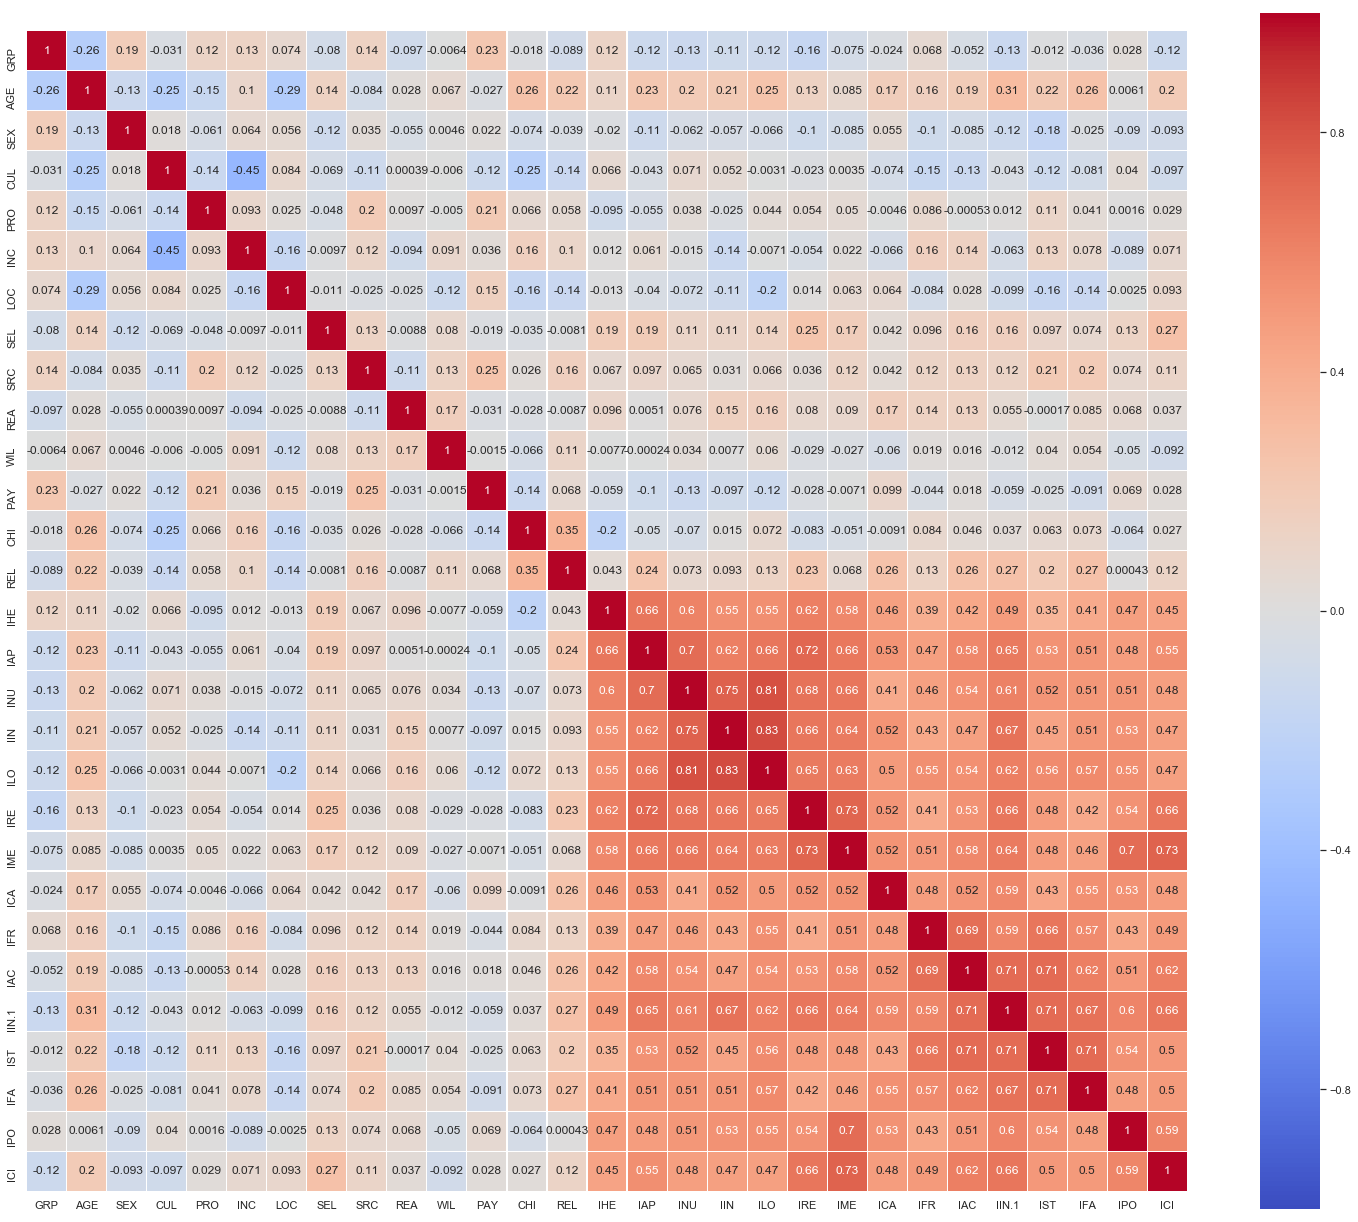

In [439]:
plt.figure(figsize=(26, 22))
sns.heatmap(data.astype(float).corr(), linewidths=0.1, square=True,
            cmap='coolwarm', linecolor='white', annot=True, vmax=1, vmin=-1);

#### 4.3 按客观因素预测养老意愿（年龄、性别、文化程度、职业、收入、家属、自理能力、子女数量）

(322, 9)
(241, 9)


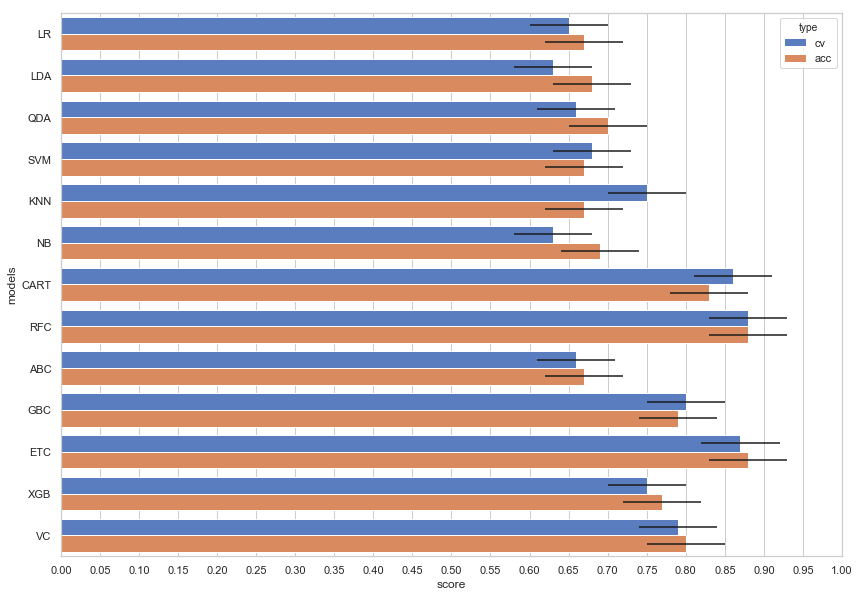

In [440]:
X, y = data.values[:,[1,2,3,4,5,6,7,12,13]], data.values[:, 0]
print(X.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y)
print(X_train.shape)
models = {
    'LR': LogisticRegression(solver='liblinear', multi_class='auto'),
    'LDA': LinearDiscriminantAnalysis(),
    'QDA': QuadraticDiscriminantAnalysis(),
    'SVM': SVC(gamma='scale'),
    'KNN': KNeighborsClassifier(),
    'NB': GaussianNB(),
    'CART': DecisionTreeClassifier(),
    'RFC': RandomForestClassifier(n_estimators=100),
    'ABC': AdaBoostClassifier(),
    'GBC': GradientBoostingClassifier(),
    'ETC': ExtraTreesClassifier(n_estimators=100),
    'XGB': XGBClassifier()
}

models['VC'] = VotingClassifier(estimators=[
    ('lr', models['LR']), ('lda', models['LDA']), ('qda', models['QDA']),
    ('svm', models['SVM']),('knn', models['KNN']), ('nb', models['NB']), 
    ('cart', models['CART']), ('rfc', models['RFC']), ('abc', models['ABC']),
    ('gbc', models['GBC']), ('etc', models['ETC']), 
    ('xgb', models['XGB'])], voting='hard')

kfold = StratifiedKFold(n_splits=10)
cv_result = []

for key in models:
        models[key].fit(X_train, y_train)
        cv_score = cross_val_score(
            models[key], X_train, y_train, scoring="accuracy", cv=kfold)
        cv_means = round(cv_score.mean(), 2)
        cv_std = round(cv_score.std(), 2)
        acc_score = round(models[key].score(X_test, y_test), 2)
        cvresult = {'models': key, 'score': cv_means, 'type': 'cv'}
        cv_result.append(cvresult)
        cvresult = {'models': key, 'score': acc_score, 'type': 'acc'}
        cv_result.append(cvresult)
    #     print(confusion_matrix(y_test, models[key].predict(X_test)))
    #     print(key)
    #     print('='*80)
    #     print(classification_report(y_test, models[key].predict(X_test)))
    #     print(key,'====',models[key].get_params())

cv_results = pd.DataFrame(cv_result)

plt.figure(figsize=(14, 10))
sns.set(style="whitegrid")
# g = sns.barplot(x='score', y='models', hue='type', data=cv_results, palette="muted");
g = sns.barplot(x='score', y='models', hue='type', data=cv_results, **{'xerr': cv_std}, palette='muted')
g.set_xticks(np.arange(0, 1.05, 0.05));

#### 4.4 决策树算法是个合适的方法

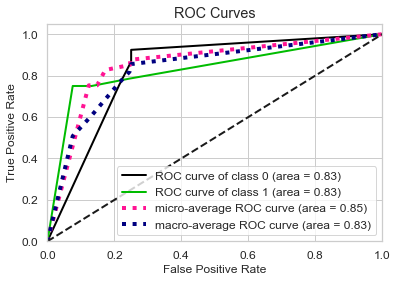

In [441]:
predicted_probas = models['CART'].predict_proba(X_test)
skplt.metrics.plot_roc(y_test, predicted_probas)
plt.show()

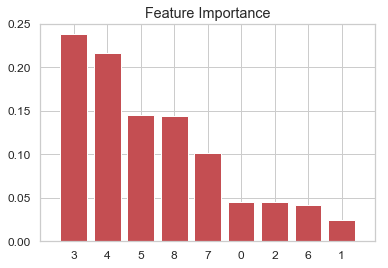

In [442]:
skplt.estimators.plot_feature_importances(models['CART'])
plt.show()

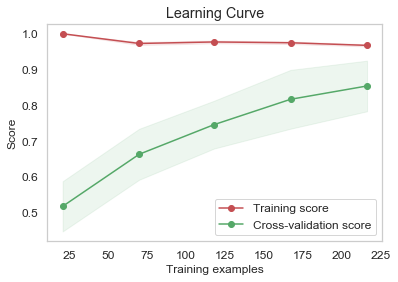

In [443]:
skplt.estimators.plot_learning_curve(models['CART'], X_train, y_train, cv=10)
plt.show()

In [444]:
key = 'CART'
print('Confusion Matrix:')
print('='*80)
print(confusion_matrix(y_test, models[key].predict(X_test)))
print('='*80)
print('')
print('Classification Report:')
print('='*80)
print(classification_report(y_test, models[key].predict(X_test)))
print('='*80)
print('')
print('Classification Report:')
print('='*80)
print(key,'====',models[key].get_params())
print('='*80)

Confusion Matrix:
[[46  7]
 [ 7 21]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.87      0.87        53
           1       0.75      0.75      0.75        28

    accuracy                           0.83        81
   macro avg       0.81      0.81      0.81        81
weighted avg       0.83      0.83      0.83        81


Classification Report:
CART ==== {'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': False, 'random_state': None, 'splitter': 'best'}


In [445]:
import sklearn
sklearn.__version__

'0.21.2'

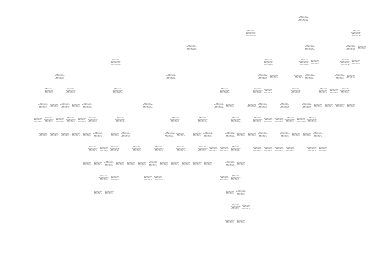

In [446]:
#### Hyper

### visual

from sklearn import tree
tree.plot_tree(models['CART'].fit(X_train, y_train));

In [453]:
import graphviz 
dot_data = tree.export_graphviz(models['CART'], out_file=None, feature_names=data.columns[1:10], filled=True, rounded=True, special_characters=True) 
graph = graphviz.Source(dot_data) 
graph.render("iris") 

ExecutableNotFound: failed to execute ['dot', '-Tpdf', '-O', 'iris'], make sure the Graphviz executables are on your systems' PATH

## Discusstion

## References

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2
cv_m = []
cv_acc = []
X, y = data_grp.values[:, 1:], data_grp.values[:, 0]   
for i in range(1,data.shape[1]): 
    ch2=SelectKBest(chi2, k=i)
    X_f = ch2.fit_transform(X, y)
    X_train, X_test, y_train, y_test = train_test_split(X_f, y)
    m_f = RandomForestClassifier(n_estimators=100)
    m_f.fit(X_train, y_train)
    cv_score = cross_val_score(m_f, X_train, y_train, scoring="accuracy", cv=kfold)
    cv_means = round(cv_score.mean(), 2)
    #     cv_std = round(cv_score.std(), 2)
    acc_score = round(m_f.score(X_test, y_test), 2)
    cv_m.append(cv_means)
    cv_acc.append(acc_score)
    print(i, cv_means, acc_score)

plt.plot(range(28), cv_m)


In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
testchi = chi2(X, y)
test = SelectKBest(score_func=chi2, k=10)
fit = test.fit(X, y)
print(fit.scores_)
features = fit.transform(X)
test.get_support()
print(test.get_support())
data_grp.columns

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier(n_estimators=100)
fit = model.fit(X, y)
print(fit.feature_importances_)